# Matrix Operations

## Multiplication

Recall that an $nxm$ matrix A
$$A = 
\begin{bmatrix}
a_{11} & ... & a_{1m}\\
a_{21} & ... & a_{2m}\\
... & ... & ...\\
a_{n1} & ... & a_{nm}
\end{bmatrix}
$$

can be multipled by an $mxp$ matrix B (in other words - the number of columns of matrix A must match the number of rows in matrix B) 

$$B = 
\begin{bmatrix}
b_{11} & b_{12} & ... & b_{1p}\\
... & ... & ... & ...\\
b_{m1} & b_{m2} & ... & b_{mp}
\end{bmatrix}
$$

which will results in an $nxp$ matrix C
$$AB = C = 
\begin{bmatrix}
c_{11} & c_{12} & ... & c_{1p}\\
c_{21} & c_{22} & ... & c_{2p}\\
... & ... & ... & ...\\
c_{n1} & c_{n2} & ... & c_{np}
\end{bmatrix}
$$

where the elements of C are defined as $c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + ... + a_{in}b_{nj}$. 

### Example

<span style="color:red">**Fill in the matrix below by replacing the question marks**</span>.

$$\begin{bmatrix} 
2 & 3 \\
1 & 1 \\
3 & 2 
\end{bmatrix}
\begin{bmatrix} 
1 & 1 & 3 \\
2 & 3 & 2 
\end{bmatrix}
=
\begin{bmatrix} 
? & ? & ? \\
? & ? & ? \\
? & ? & ?
\end{bmatrix}
$$



**Question** 

Is AB = BA?

<span style="color:red">**Report the matrix BA using the above matrices (assume the first is A, and the second is B). You can either do this in Markdown or pass it as a variable and creating a matrix object.**</span>



## Transposition

The transpose of a matrix is the act of switching the rows and the columns such that each value at position $ij$ is moved to position $ji$: $\Big[A^T\Big]_{ij} = \Big[A\Big]_{ji}$

### Example

$$
\begin{bmatrix}
2 & 3 \\
1 & 1 \\
3 & 2 
\end{bmatrix}^ T
=
\begin{bmatrix}
2 & 1 & 3 \\
3 & 1 & 2
\end{bmatrix}
$$

In [ ]:
t(A)

## Identity Matrix

In [ ]:
diag(4)

In [ ]:
diag(nrow(A))%*%A

In [ ]:
A%*%diag(ncol(A))

## Determinant

The determinant of a *square* matrix A, det(A) is the amount by which a space or area will be scaled when transformed (mulitplied) by A. 

For a $2x2$ matrix, the determinant is: $det(\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{bmatrix}) = a_{11}a_{22} - a_{12}a_{21}$.

### Example

<span style="color:red">**Find the determinant of the matrix below, and replace the question mark with your answer**</span>.

$$det(
\begin{bmatrix}
4 & 1\\
3 & 2
\end{bmatrix})
= ?
$$

What about matrices larger than $2x2$?

$$det(
\begin{bmatrix}
4 & 1 & 2\\
3 & 2 & 1\\
1 & 1 & 3
\end{bmatrix})
= ?
$$

This requires **minors** and **cofactors**.

**minors** - A minor for any element is the determinant that results when the row and column that element are in are deleted. The notation $M_{ij}$ is used to stand for the minor of the element in row $i$ and column $j$.

In the above matrix, $M_{21} = det(\begin{bmatrix} 1 & 2 \\ 1 & 3 \end{bmatrix}) = 3 - 2 = 1$

**cofactors** - A cofactor for any element is either the minor or the opposite of the minor, depending on where the element is in the original determinant. If the row and column of the element add up to be an even number, then the cofactor is the same as the minor. If the row and column of the element add up to be an odd number, then the cofactor is the opposite of the minor.

You can think of the above matrix as a matrix of $+$ and $-$.
$$
\begin{bmatrix}
+ & - & +\\
- & + & -\\
+ & - & +
\end{bmatrix}
$$
The cofactor $C_{ij}$ is the product of the element in row $i$ column $j$, the sign of the element in row $i$ column $j$, and the element's minor.

In the above matrix, $C_{21} = 3 \times -1 \times det(\begin{bmatrix} 1 & 2 \\ 1 & 3 \end{bmatrix}) = 3(-1)(3-2) = -3$.

Finally, the steps for calculating the determinant of a square matrix larger than $2x2$ are:
* Pick a row, any row
* Calculate the sum of cofactors

$$det(
\begin{bmatrix}
4 & 1 & 2\\
3 & 2 & 1\\
1 & 1 & 3
\end{bmatrix})
= ?
$$

Let's calculate the determinant of the above matrix using the first row:

$$det(
\begin{bmatrix}
4 & 1 & 2\\
3 & 2 & 1\\
1 & 1 & 3
\end{bmatrix})
=
C_{11} + C_{12} + C_{13}
$$

$C_{11} = 4 \times det(\begin{bmatrix} 2 & 1\\ 1 & 3\end{bmatrix} = 20$

$C_{12} = 1 \times -1 \times det(\begin{bmatrix} 3 & 1\\ 1 & 3\end{bmatrix} = -8$

$C_{13} = 2 \times det(\begin{bmatrix} 3 & 2\\ 1 & 1\end{bmatrix} = 2$

$ C_{11} + C_{12} + C_{13} = 14$

Try one of the other rows on your own. <span style="color:red">**Show your work for one of the other rows as shown above (specifically, the calculation and summation of each of the cofactors). This can be done in either Markdown or passing the equations to objects**</span>.

# GMMs

In [1]:
library(mclust)

ERROR: Error in library(mclust): there is no package called ‘mclust’


The gaussian mixture model (GMM) is a modeling technique that uses a probability distribution to estimate the likelihood of a given point in a continuous set. For the GMM, we assume that our classes bear the markings of a normally distributed density function. When the two classes are clearly defined, the guassian distribution works well as an estimate for class-conditional probabilties.

First we'll be implementing our own GMM to gain a basic understanding of the underlying algorithms in built-in packages. 

GMMs utilize the **Expectation-Maximization (EM) algorithm**. 

Step 1: Expectation Step (E-Step) - also known as responsibility

$$r_{ic} = \frac{\pi_cN(x_i | \mu_c,\Sigma_c)}{\sum_{c'}\pi_{c'}N(x_i | \mu_{c'},\Sigma_{c'})}$$

The normal distribution can take on a univariate or multivariate form. For the examples below, I will use the multivariate form:

$$N(\mu_k, \Sigma_k) = \frac{e^{-\frac{1}{2}(x_i-\mu_k)^T \Sigma^{-1} (x_i-\mu_k) }}{\sqrt{|2\pi\Sigma|}}$$

In [24]:
# Multivariate Normal PDF Function Given a matrix x, mu (mean), and
# sigma (covariance), we can calculate the probability density for each
# row using the apply function. The function returns a column vector of
# probabilities.

mvpdf <- function(x, mu, sigma) {
    if (det(sigma) == 0) {
        warning("Determinant is equal to 0.")
    }
    apply(x, 1, function(x) exp(-(1/2) * (t(x) - mu) %*% MASS::ginv(sigma) %*% 
        t(t(x) - mu))/sqrt(det(2 * pi * sigma)))
}

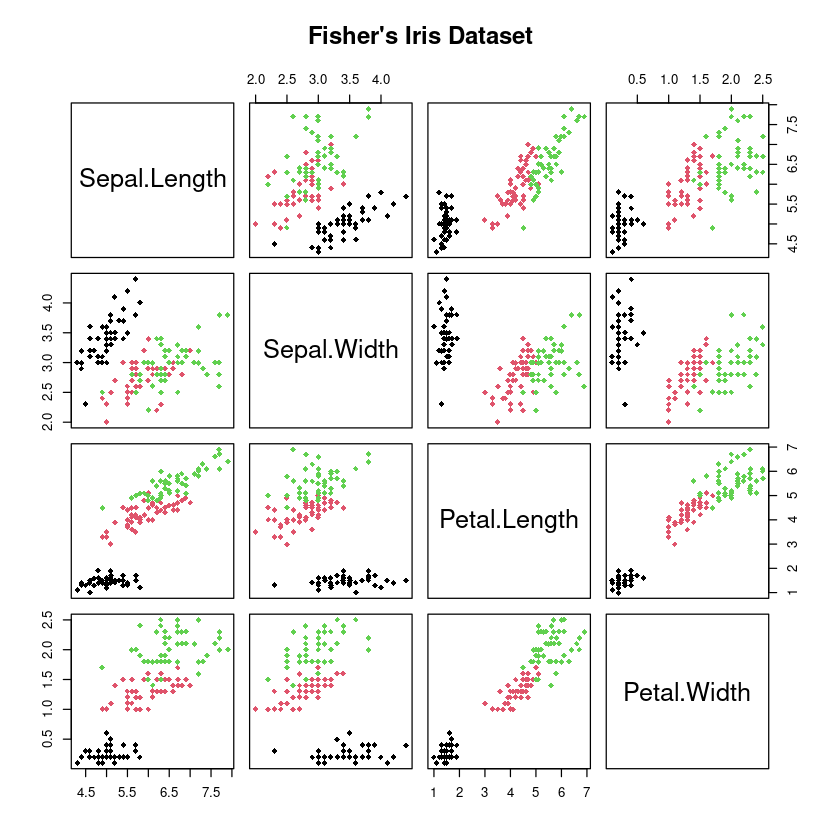

In [25]:
# Plot our dataset.
plot(iris[, 1:4], col = iris$Species, pch = 18, main = "Fisher's Iris Dataset")

**Initialization**

In [31]:
# Mclust comes with a method of hierarchical clustering. We'll
# initialize 3 different classes.
initialk <- mclust::hc(data = iris, modelName = "EII")
initialk <- mclust::hclass(initialk, 3) # choosing the solution corresponding to k=3

# First split by class and calculate column-means for each class.
mu <- split(iris[, 1:4], initialk)
mu <- t(sapply(mu, colMeans))

# Covariance Matrix for each initial class.
cov <- list(diag(4), diag(4), diag(4))

# Mixing Components
a <- runif(3)
a <- a/sum(a) #such that the mixing components sum to 1
a

[1] 0.09378495 0.50749201 0.39872305

**Maximization**

Once the e-step has been completed, we need to maximize our results. Listed below is each equation we use during the maximization step:

* $$m_c = \Sigma_i r_{ic}$$ 
* $$\pi_c = \frac{m_c}{N}$$
* $$\mu_c = \frac{1}{m_c} \sum_i{r_{ic}x_i}$$
* $$\Sigma_c = \frac{1}{m_c} \sum_i{r_{ic}(x_i - \mu_c)^T(x_i-\mu_c)}$$


In [43]:
BIC <- matrix(nrow = 100, ncol = 3)

for(i in 1:100){
    # Calculate PDF with class means and covariances.
    z <- cbind(mvpdf(x = iris[, 1:4], mu = mu[1, ], sigma = cov[[1]]), mvpdf(x = iris[, 
        1:4], mu = mu[2, ], sigma = cov[[2]]), mvpdf(x = iris[, 1:4], mu = mu[3, 
        ], sigma = cov[[3]]))

    # Expectation Step for each class.
    r <- cbind((a[1] * z[, 1])/rowSums(t((t(z) * a))), (a[2] * z[, 2])/rowSums(t((t(z) * 
        a))), (a[3] * z[, 3])/rowSums(t((t(z) * a))))

    # Choose the highest rowwise probability
    eK <- factor(apply(r, 1, which.max))

    # Total Responsibility for each class
    mc <- colSums(r)

    # Update Mixing Components.
    a <- mc/NROW(iris)

    # Update our Means
    mu <- rbind(colSums(iris[, 1:4] * r[, 1]) * 1/mc[1], colSums(iris[, 1:4] * 
        r[, 2]) * 1/mc[2], colSums(iris[, 1:4] * r[, 3]) * 1/mc[3])


    # Update Covariance matrix.
    cov[[1]] <- t(r[, 1] * t(apply(iris[, 1:4], 1, function(x) x - mu[1, ]))) %*% 
        (r[, 1] * t(apply(iris[, 1:4], 1, function(x) x - mu[1, ]))) * 1/mc[1]

    cov[[2]] <- t(r[, 2] * t(apply(iris[, 1:4], 1, function(x) x - mu[2, ]))) %*% 
        (r[, 2] * t(apply(iris[, 1:4], 1, function(x) x - mu[2, ]))) * 1/mc[2]

    cov[[3]] <- t(r[, 3] * t(apply(iris[, 1:4], 1, function(x) x - mu[3, ]))) %*% 
        (r[, 3] * t(apply(iris[, 1:4], 1, function(x) x - mu[3, ]))) * 1/mc[3]
                      
    # Compute the sum of the mixture densities, take the log, and add the
    # column vector.
    loglik <- sum(log(apply(t(t(z) * a), 1, sum)))

    # BIC is calculated using the equation
    bic <- -2 * loglik + 14 * log(NROW(iris))

    BIC[i,] <- c(i, bic, loglik)
}

a

[1] 0.3333333 0.2996030 0.3670637

In [33]:
eK

ERROR: Error in eval(expr, envir, enclos): object 'eK' not found


$$log N(\mu, \Sigma) = log \sum_c{\pi_c*N(\mu_c,\Sigma_c)}$$
$$BIC=-2ln \hat{L} + k * ln(n)$$

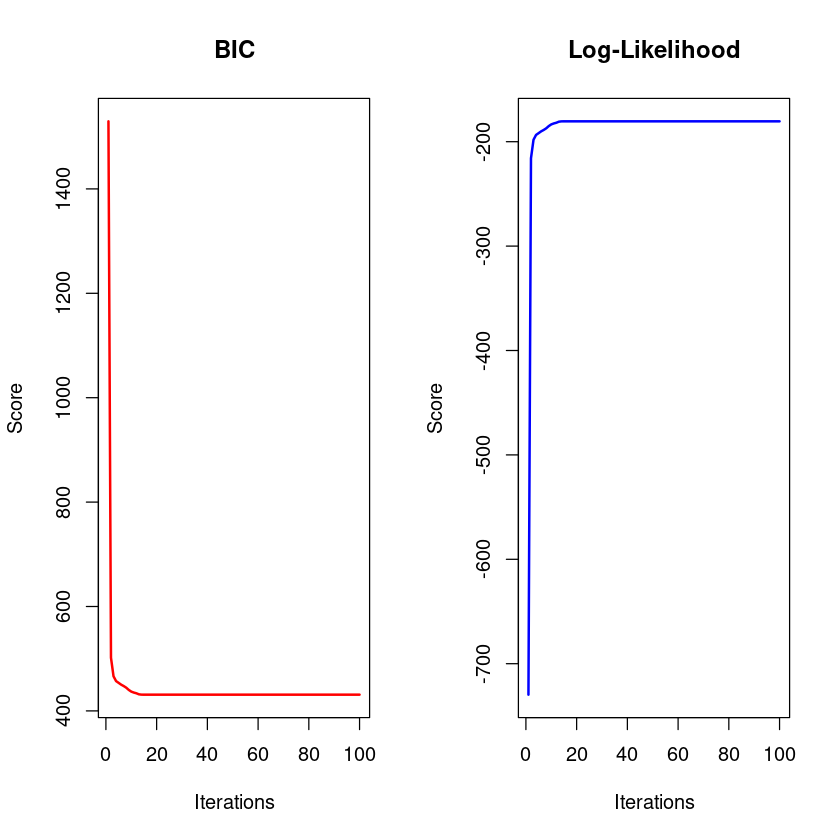

In [45]:
# After every iteration we can plot.
par(mfrow = c(1, 2))
plot(BIC[, c(1, 2)], type = "l", lwd = 2, col = "red", main = "BIC", xlab = "Iterations", 
    ylab = "Score")
plot(BIC[, c(1, 3)], type = "l", lwd = 2, col = "blue", main = "Log-Likelihood", 
    xlab = "Iterations", ylab = "Score")

In [32]:
# plot by clustering
plot(iris[, 1:4], col = eK, pch = 18, main = "Fisher's Iris Dataset")

ERROR: Error in pairs.default(data.matrix(x), ...): object 'eK' not found


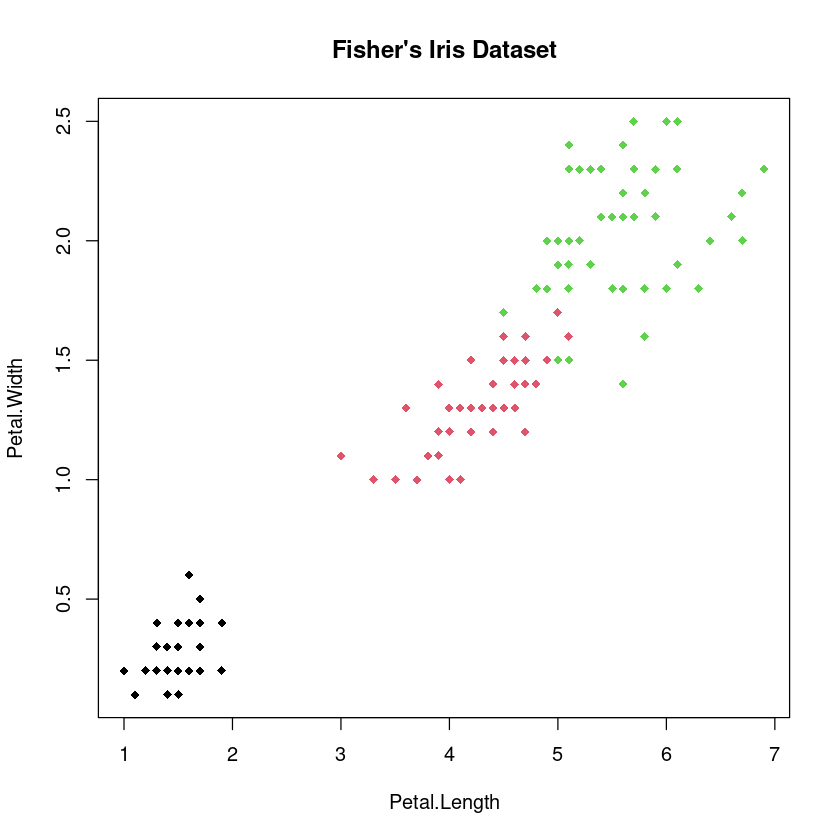

In [47]:
# plot by species
plot(iris[, 1:4], col = iris$Species, pch = 18, main = "Fisher's Iris Dataset")

In [48]:
# custom clustering vs species
table(eK, iris$Species)

   
eK  setosa versicolor virginica
  1     50          0         0
  2      0         45         0
  3      0          5        50

### Using `mclust`

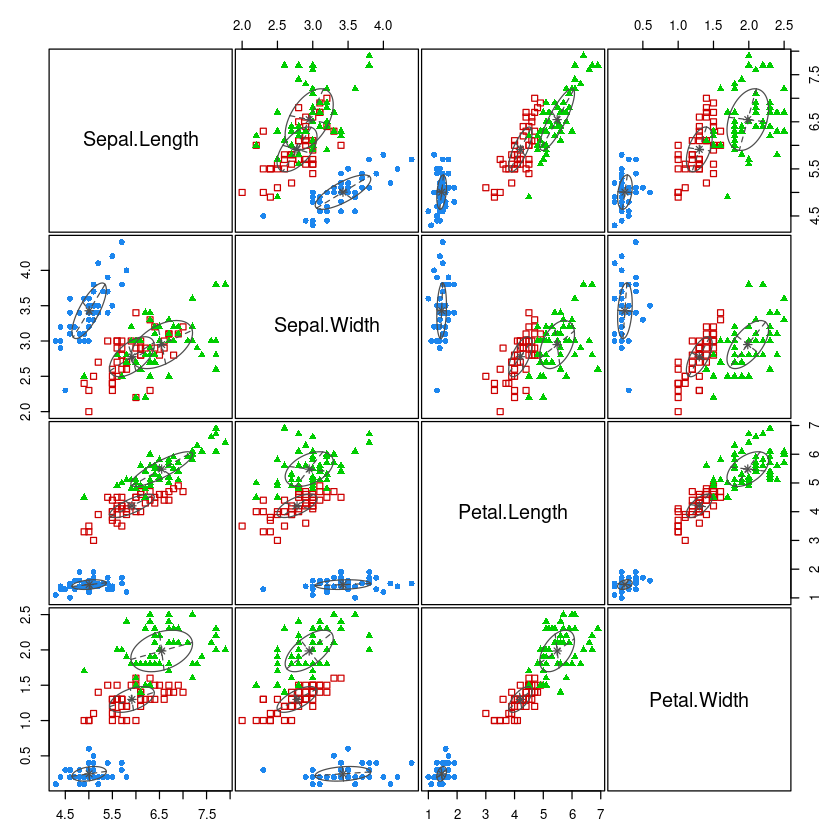

In [49]:
# Load the package
library(mclust)

# Select 4 continuous variables and look for three distinct groups.
mcl.model <- Mclust(iris[, 1:4], 3)

# Plot our results.
plot(mcl.model, what = "classification", main = "Mclust Classification")

In [51]:
# mclust vs species
table(mcl.model$classification, iris$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         45         0
  3      0          5        50

In [52]:
# custom clustering vs mclust
table(eK, mcl.model$classification)

   
eK   1  2  3
  1 50  0  0
  2  0 45  0
  3  0  0 55

Now perform a GMM analysis on `iris` dataset **without** specifying the number of clusters. This will default to analyzing 1-9 clusters. Explore the `Mclust` function in the help documentation to figure out what features of the output will give you information on what the optimal number of clusters are. What does the analysis tell you about the best number of clusters? <span style="color:red">**You can answer the questions as comments or however you'd prefer. Make sure to address which two components of the model object (which we covered in lab) are useful in determining the optimal number of clusters**</span>.

Now perform the same analyses on the `faithful` dataset. First plot based on k=2. Then do a k=1-9 analysis and determine the optimal number of clusters. <span style="color:red">**Make sure to include the plot in your submission, as well as a comment or other on the optimal number of clusters found**</span>.

In [57]:
str(faithful)

'data.frame':	272 obs. of  2 variables:
 $ eruptions: num  3.6 1.8 3.33 2.28 4.53 ...
 $ waiting  : num  79 54 74 62 85 55 88 85 51 85 ...
